In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('adult.data')

In [5]:
# Removing all Columns without a continuous Attributes
popColumns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'nativecountry']
for i in popColumns:
    df.pop(i)
pass

In [6]:
# Standardizing Salary Column since it is in the format of strings
# If Salary == ' <50k' == -1
# Else Salary == ' >50k' == 1
npSalary = np.zeros((df.shape[0],1))
for i in range(df.shape[0]):
    npSalary[i][0] = -1 if df.iloc[i][6] == ' <=50K' else 1

In [ ]:
#Normalizing Data in Mean and Unit Variance
def normalization(df):
    npNorm = np.zeros((df.shape[0],df.columns.size))
    for i in range(df.columns.size-1):
        mean_ = df.iloc[:,i].mean()
        std_ = df.iloc[:,i].std()
        for j in range(df.shape[0]):
            npNorm[j][i] = (df.iloc[j][i]-mean_)/std_
    return npNorm

In [ ]:
npNorm = normalization(df)

In [ ]:
df_norm = pd.DataFrame(npNorm)
df_norm.header = False
df_norm[6] = npSalary

In [7]:
df['salary'] = npSalary

In [8]:
y = df.pop('salary')
X = df

In [9]:
accuracyList = []

In [22]:
class SVM:
    def __init__(self, learningRate=0.1, regStrength=1e-2):
        self.regStrength=regStrength
        self.learningRate=learningRate

    def computeCost(self, W, X, Y):
        # calculate hinge loss
        M = X.shape[0]
        Y = np.array(Y)
        distances = 1 - Y.reshape(1, -1) * (np.dot(X, W))
        distances[distances < 0] = 0 
        hinge_loss = self.regStrength * (np.sum(distances) / M)

        cost = 1 / 2 * np.dot(np.transpose(W), W) + hinge_loss
        return cost
    
    def calcCostGradient(self, W, X_batch, Y_batch):

        Y_final= Y_batch.astype(np.float64)
        X_final = X_batch
        W_64 = W.astype(np.float64)
        distance = 1 - (Y_final * np.dot(X_final, W_64))
        dw = np.zeros(len(W_64))
        dw = dw.reshape(-1, 1)
        if all(item < 0 for item in distance):
            di = W_64
        else:
            x_test = W_64 - ((self.regStrength * Y_final) * X_final.reshape(-1, 1))
            di = x_test
        dw += di
        return dw
    
    def testAccuracy(self, X_test, weights):
        y_test_predicted = np.ndarray(shape=(len(X_test), 1))
        for i in range(X_test.shape[0]):
            yp = np.sign(np.dot(np.transpose(weights), X_test.to_numpy()[i])) #model
            y_test_predicted[i] = yp
        return y_test_predicted

    def validation(self, X_validate,weights, Y_validate):
        finalWeights = list(weights)
        results = self.testAccuracy(X_validate, finalWeights)
        a = accuracy_score(Y_validate, results)
        return (a / len(X_validate)) * 100

    def sgd(self, features, outputs, maxEpochs):
        weights = np.zeros(features.shape[1])
        weights = weights.reshape(-1, 1)
        epochs = 0
        previousCost = float("inf")
        costTreshold = 0.01  
        for epoch in range(1, maxEpochs):
            print(f"{epoch,}", end = " ")
            X, Y = shuffle(features, outputs)
            for i in range(0,len(X),300):
                if (i % 30 == 0):
                    validate = self.validation(features, weights, outputs)
                    accuracyList.append(validate)
                    try:
                        ascent = self.calcCostGradient(weights, np.array(X.iloc[[i]]), Y[i])
                        weights -= (self.learningRate * ascent)
                    except:
                        continue

            if epoch == maxEpochs-1:
                cost = self.computeCost(weights, features, outputs)
                print(f"Epoch is:{epoch} and Cost is: {cost}")

                if abs(previousCost - cost) < costTreshold * previousCost:
                    return weights
                previousCost = cost
                epochs += 1
        return weights
           
    def test(self, X_test, weights):
        y_test_predicted = np.ndarray(shape=(len(X_test), 1))
        for i in range(X_test.shape[0]):
            yp = np.sign(np.dot(np.transpose(weights), X_test.to_numpy()[i])) #model
            y_test_predicted[i] = yp
        return y_test_predicted

In [23]:
model = SVM()

In [24]:
X_train, X_test_val, y_train, y_test_val = train_test_split( X, y, test_size=0.20, random_state=57)
X_test, X_val, y_test, y_val = train_test_split( X_test_val, y_test_val, test_size=0.50, random_state=57)

In [25]:
weights = model.sgd(X_train, y_train, maxEpochs=100)

(1,) (2,) (3,) (4,) (5,) (6,) (7,) (8,) (9,) (10,) (11,) (12,) (13,) (14,) (15,) (16,) (17,) (18,) (19,) (20,) (21,) (22,) (23,) (24,) (25,) (26,) (27,) (28,) (29,) (30,) (31,) (32,) (33,) (34,) (35,) (36,) (37,) (38,) (39,) (40,) (41,) (42,) (43,) (44,) (45,) (46,) (47,) (48,) (49,) (50,) (51,) (52,) (53,) (54,) (55,) (56,) (57,) (58,) (59,) (60,) (61,) (62,) (63,) (64,) (65,) (66,) (67,) (68,) (69,) (70,) (71,) (72,) (73,) (74,) (75,) (76,) (77,) (78,) (79,) (80,) (81,) (82,) (83,) (84,) (85,) (86,) (87,) (88,) (89,) (90,) (91,) (92,) (93,) (94,) (95,) (96,) (97,) (98,) (99,) Epoch is:99 and Cost is: [[1.3780426e+09]]


In [14]:
weights

array([[9.38673993e-03],
       [5.29718729e+00],
       [1.00939147e-03],
       [2.21248101e-01],
       [1.23643460e-01],
       [7.36491242e-03]])

In [15]:
df_a = pd.DataFrame(model.test(X_val, weights), columns=['y_test_predicted'])

In [16]:
from sklearn.metrics import confusion_matrix as cm
cm(y_val, df_a['y_test_predicted'])

array([[   0, 2472],
       [   0,  785]])

In [17]:
from matplotlib import pyplot as plt

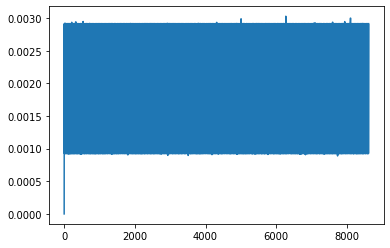

In [18]:
plt.plot(accuracyList)

In [21]:
from sklearn.metrics import classification_report as cr
print(cr(y_val, df_a['y_test_predicted']))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      2472
         1.0       0.24      1.00      0.39       785

    accuracy                           0.24      3257
   macro avg       0.12      0.50      0.19      3257
weighted avg       0.06      0.24      0.09      3257

